# Week 7: Multilayer Perceptron Neural Networks

### Aims:
* To gain some experience in constructing multilayer perceptron networks and solving problems
with them.
* To produce some assessable work for this subject.

In [ ]:
# Common Imports
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch

In [ ]:
# ANSI color
class color:
  GREEN_BOLD = '\033[1;32m'
  YELLOW_BOLD = '\033[1;33m'
  BLUE_BOLD = '\033[1;34m'
  WHITE_BOLD = '\033[1;37m'
  END = '\033[0m'

### Procedure:
Some of the questions in this Prac use python libraries, in particular the PyTorch library
(https://pytorch.org/) developed by Meta AI$^1$. If you are not familiar with python it should still be
possible to work through the prac questions using the examples/partial code provided.

$$^{\text{1 Note that this is originally based on Torch, developed in Lua and first released in 2002 (https://en.wikipedia.org/wiki/Torch_(machine_learning)).}}$$


### Question 1: The XOR dataset is a classic toy problem in the history of neural networks. Use the code provided to try and train a 2-2-1 MLP to learn XOR. Use the code to verify for yourself the following key points:

* The result of the training is sensitive to the initialization of the weights
* The result of the training is sensitive to the learning rate.
* The result of the training is sensitive to the number of epochs/weight updates.
* The result of the training is sensitive to the scale of the (input) data.

Hint: think about what variable(s) you need to look at to verify these things. Add some lines to
print out and/or plot some of the variables before/during/after training.

In [ ]:
# === Step 1: XOR input and expected output ===
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
y = np.array([[0], [1], [1], [0]])

# === Step 2: Activation functions ===
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

# === Step 3: Matrix multiplication using nested loops (custom implementation) ===
def matmul(A, B):
    rows, cols = A.shape[0], B.shape[1]
    result = np.zeros((rows, cols))
    for i in range(rows):
        for j in range(cols):
            for k in range(A.shape[1]):
                result[i][j] += A[i][k] * B[k][j]
    return result

# === Step 4: Neural Network class ===
class SimpleXORNet:
    def __init__(self, input_size=2, hidden_size=2, output_size=1, seed=0):
        np.random.seed(seed)
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros((1, output_size))

    def forward(self, X):
        self.z1 = matmul(X, self.W1) + self.b1
        self.a1 = sigmoid(self.z1)
        self.z2 = matmul(self.a1, self.W2) + self.b2
        self.a2 = sigmoid(self.z2)
        return self.a2

    def compute_loss(self, y_pred, y_true):
        return np.mean((y_pred - y_true) ** 2)

    def backward(self, X, y, learning_rate=0.1):
        # Output layer
        d_a2 = 2 * (self.a2 - y)
        d_z2 = d_a2 * sigmoid_derivative(self.z2)
        dW2 = matmul(self.a1.T, d_z2)
        db2 = np.sum(d_z2, axis=0, keepdims=True)

        # Hidden layer
        d_a1 = matmul(d_z2, self.W2.T)
        d_z1 = d_a1 * sigmoid_derivative(self.z1)
        dW1 = matmul(X.T, d_z1)
        db1 = np.sum(d_z1, axis=0, keepdims=True)

        # Gradient descent update
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2
        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1

    def train(self, X, y, epochs=10000, learning_rate=0.1, verbose=True):
        for epoch in range(epochs):
            y_pred = self.forward(X)
            loss = self.compute_loss(y_pred, y)
            self.backward(X, y, learning_rate)

            if verbose and epoch % 1000 == 0:
                print(f"{color.YELLOW_BOLD}Epoch{color.END} {epoch}, {color.BLUE_BOLD}Loss{color.END}: {loss:.6f}")

    def predict(self, X):
        return np.round(self.forward(X))

# === Step 5: Train the network ===
model = SimpleXORNet()
model.train(X, y)

# === Step 6: Final Predictions ===
print(f"\n{color.GREEN_BOLD}Final predictions:{color.END}")
print(model.predict(X))  # Should output values close to [0, 1, 1, 0]


Epoch 0, Loss: 0.269637
Epoch 1000, Loss: 0.146132
Epoch 2000, Loss: 0.132881
Epoch 3000, Loss: 0.129551
Epoch 4000, Loss: 0.128140
Epoch 5000, Loss: 0.127377
Epoch 6000, Loss: 0.126904
Epoch 7000, Loss: 0.126583
Epoch 8000, Loss: 0.126353
Epoch 9000, Loss: 0.126179

Final predictions:
[[0.]
 [0.]
 [1.]
 [1.]]



## Introduction to PyTorch
### Question 2: On the course website you will find a link to a google colab notebook. Read and step through this notebook to see how to create and train MLPs in PyTorch.

In [ ]:
print(torch.__version__)
print('Cuda Available : {}'.format(torch.cuda.is_available()))
print('GPU - {0}'.format(torch.cuda.get_device_name()))
!python --version

2.6.0+cu124
Cuda Available : True
GPU - Tesla T4
Python 3.11.12


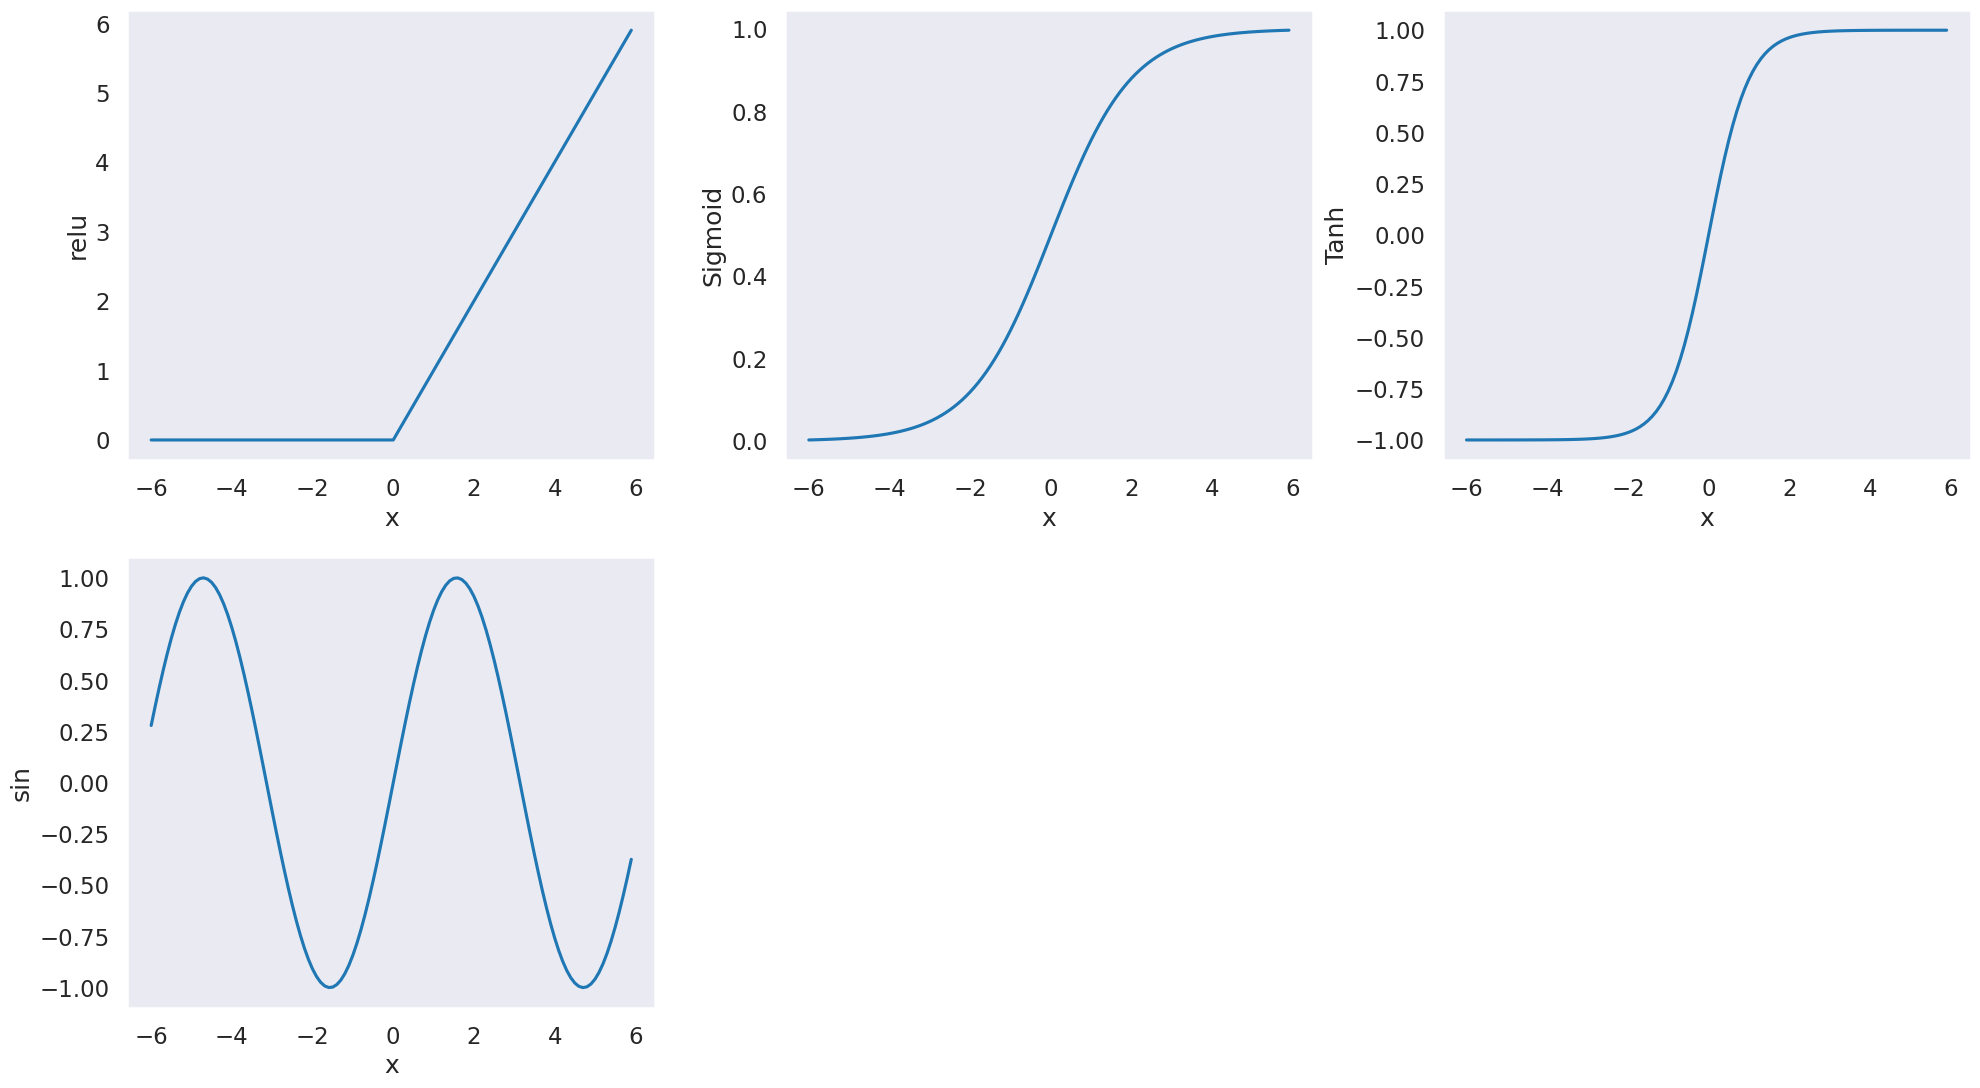

In [ ]:
plt.figure(figsize=(20, 16))
def plot_custom_activation_function(function, input, n):
  # Set the plot style
  plt.subplot(3, 3, n)
  sns.set_context('talk')
  sns.set_style('dark')

  output = function(input)

  sns.lineplot(x=input.numpy(), y=output.numpy())
  plt.xlabel('x')

  label = function.__class__.__name__ if isinstance(function, nn.Module) else function.__name__ if callable(function) else str(function)
  plt.ylabel(label)



input = torch.arange(-6,6,step=0.1)

plot_custom_activation_function(torch.relu, input, 1)
plot_custom_activation_function(torch.nn.Sigmoid(), input, 2)
plot_custom_activation_function(torch.nn.Tanh(), input, 3)
plot_custom_activation_function(torch.sin, input, 4)

plt.tight_layout()
plt.show()

In [ ]:
import torchvision

# Load CIFAR10 dataset
CIFAR10_train = torchvision.datasets.CIFAR10('CIFAR10_data', download=True, train=True, transform=True)
CIFAR10_validation = torchvision.datasets.CIFAR10('CIFAR10_data', download=True, train=False, transform=True)

# Prepare data
training_data = (CIFAR10_train.data.reshape((-1, 32*32*3)) / 255.0).astype(np.float32)
training_labels = np.array(CIFAR10_train.targets)
validation_data = (CIFAR10_validation.data.reshape((-1, 32*32*3)) / 255.0).astype(np.float32)
validation_labels = np.array(CIFAR10_validation.targets)

Step: 9999 Loss: 1.90

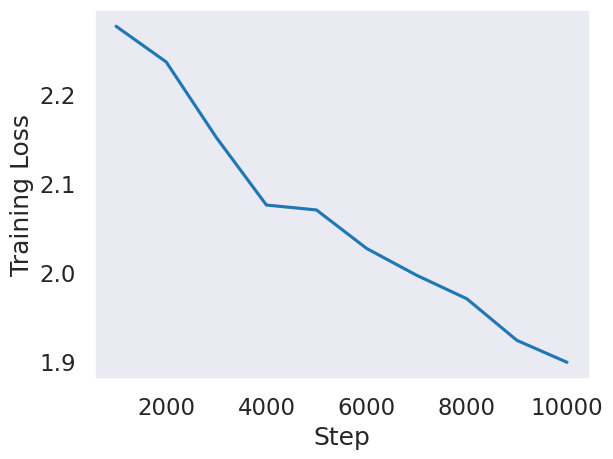

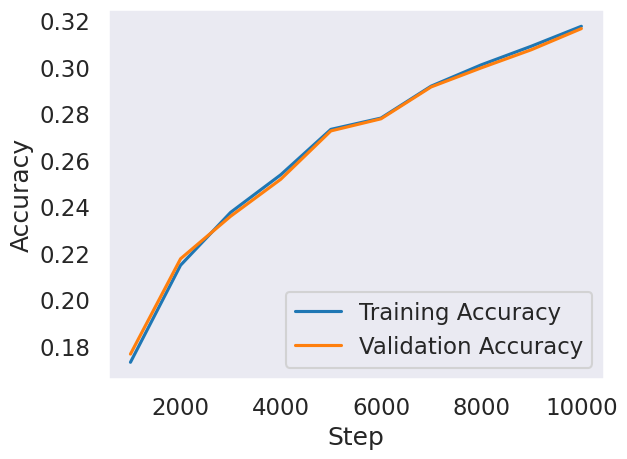

In [ ]:
from typing import List #just to help readability

def create_sequential_model(dim_in: int, dim_out: int, hidden_layer_sizes: List[int], activation_fn=torch.nn.ReLU):
    layers = []
    hiddens = [dim_in, *hidden_layer_sizes]
    for i in range(len(hiddens) - 1):
        layers.append(torch.nn.Linear(hiddens[i], hiddens[i + 1]))
        layers.append(activation_fn())
    layers.append(torch.nn.Linear(hiddens[-1], dim_out))  # Output layer
    return torch.nn.Sequential(*layers)

# Define model
model = create_sequential_model(32*32*3, 10, [100, 100], activation_fn=torch.nn.ReLU)

# Set up loss function and optimizer
criterion = torch.nn.CrossEntropyLoss(reduction='mean')
optimiser = torch.optim.SGD(model.parameters(), lr=1e-3)

# Training loop
batch_size = 256
optimisation_steps = int(1e4)
metrics = []

for step in range(optimisation_steps):
    idx = np.random.randint(0, training_data.shape[0], size=batch_size)
    x_batch, y_batch = torch.from_numpy(training_data[idx, :]), torch.from_numpy(training_labels[idx])

    # Forward pass
    y_pred = model(x_batch)
    loss = criterion(y_pred, y_batch)

    # Backward pass
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

    # Log metrics
    if step % 100 == 99:
        if step % 1000 == 999:
            train_pred = model(torch.from_numpy(training_data))
            val_pred = model(torch.from_numpy(validation_data))
            train_accuracy = torch.mean((train_pred.argmax(dim=1) == torch.from_numpy(training_labels)).float())
            val_accuracy = torch.mean((val_pred.argmax(dim=1) == torch.from_numpy(validation_labels)).float())
            metrics.append([step, loss.item(), train_accuracy.numpy(), val_accuracy.numpy()])
        print(f'\rStep: {step} Loss: {loss.item():.2f}', end='')


In [ ]:
# Plotting results
metrics = np.asarray(metrics)
sns.lineplot(x=metrics[:, 0], y=metrics[:, 1])
plt.xlabel('Step')
plt.ylabel('Training Loss')
plt.show()

sns.lineplot(x=metrics[:, 0], y=metrics[:, 2], label='Training Accuracy')
sns.lineplot(x=metrics[:, 0], y=metrics[:, 3], label='Validation Accuracy')
plt.xlabel('Step')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## MNIST Data
### Question 3: Train an MLP on the MNIST data (available on the course website). You will need to make several “design choices” to do this. Make sure you split your dataset into a training, validation and test set. Your answer for this question should describe the design choices you made to create and train your network and a report of your results. You can also include error graphs or any other output you feel is useful.

* **Python Help**: some example code is provided using either sklearn or pytorch.
* **Matlab Help**: run the Neural Network Pattern Recognition tool from the command line(nprtool). You can import a dataset (e.g. cancer) and step through the creation, training and evaluation of a neural network inside the tool. You can also generate code from this process. You could then modify this code to apply to the MNIST data (or go the opposite way: import the MNIST data into the GUI tool).<br /><br />
There are other apps that could be used: Classification Learner or Deep Network Designer. <br/><br />
The following code may be used in formatting the data. You will have to change it slightly to use the test and train dataset.
```matlab
load('mnist_train.mat');
labels = [];
for i = 1:10
labels = [labels, train_labels == i];
end
```

In [80]:
from torchvision import datasets, transforms
from torch.utils.data import random_split, DataLoader

# Data transforms
transform = transforms.Compose([transforms.ToTensor()])

# Load data
train_val_data = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_data = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Split train/val
train_data, val_data = random_split(train_val_data, [50000, 10000])

# Dataloaders
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = DataLoader(val_data, batch_size=64)
test_loader = DataLoader(test_data, batch_size=64)

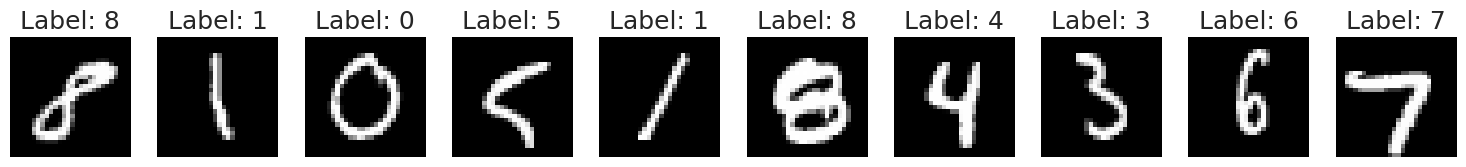

In [81]:
import random
def visualize_samples(dataset, model=None, num_samples=10, device='cpu'):
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))

    # Randomly pick num_samples
    random_indices = random.sample(range(len(dataset)), num_samples)

    for i, ax in enumerate(axes):
        idx = random_indices[i]
        image, label = dataset[idx]

        # Convert to numpy array and normalize (if necessary)
        img = image.squeeze().numpy()

        # Display image
        ax.imshow(img, cmap='gray')

        # If a model is passed, predict the label
        if model is not None:
            model.eval()
            with torch.no_grad():
                image = image.unsqueeze(0).to(device)  # Add batch dimension and move to device
                output = model(image)
                pred = output.argmax(dim=1).item()
                ax.set_title(f'Label: {label}')
        else:
            ax.set_title(f'Label: {label}')

        ax.axis('off')  # Hide axis

    plt.tight_layout()
    plt.show()

visualize_samples(train_val_data, model=model, num_samples=10, device='cuda' if torch.cuda.is_available() else 'cpu')

In [82]:
# MLP model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(784, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10)
        )

    def forward(self, x):
        return self.model(x)

# Training
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = MLP().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_losses, val_losses = [], []

for epoch in range(10):
    model.train()
    running_loss = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    train_losses.append(running_loss / len(train_loader))

    # Validation
    model.eval()
    val_loss = 0
    correct = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            output = model(images)
            val_loss += criterion(output, labels).item()
            pred = output.argmax(dim=1)
            correct += (pred == labels).sum().item()
    val_losses.append(val_loss / len(val_loader))
    val_acc = correct / len(val_data)

    print(f"{color.GREEN_BOLD}Epoch{color.END} {epoch+1}: {color.YELLOW_BOLD}Train Loss{color.END} = {train_losses[-1]:.4f}, {color.YELLOW_BOLD}Val Loss{color.END} = {val_losses[-1]:.4f}, {color.BLUE_BOLD}Val Acc{color.END} = {val_acc:.4f}")


Epoch 1: Train Loss = 0.3746, Val Loss = 0.1947, Val Acc = 0.9437
Epoch 2: Train Loss = 0.1550, Val Loss = 0.1505, Val Acc = 0.9547
Epoch 3: Train Loss = 0.1082, Val Loss = 0.1068, Val Acc = 0.9683
Epoch 4: Train Loss = 0.0819, Val Loss = 0.1052, Val Acc = 0.9687
Epoch 5: Train Loss = 0.0631, Val Loss = 0.0959, Val Acc = 0.9717
Epoch 6: Train Loss = 0.0497, Val Loss = 0.0920, Val Acc = 0.9732
Epoch 7: Train Loss = 0.0397, Val Loss = 0.0883, Val Acc = 0.9751
Epoch 8: Train Loss = 0.0342, Val Loss = 0.0883, Val Acc = 0.9765
Epoch 9: Train Loss = 0.0272, Val Loss = 0.0938, Val Acc = 0.9765
Epoch 10: Train Loss = 0.0213, Val Loss = 0.0980, Val Acc = 0.9767


In [83]:
model.eval()
correct = 0
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        output = model(images)
        pred = output.argmax(dim=1)
        correct += (pred == labels).sum().item()

test_acc = correct / len(test_data)
print(f"Test Accuracy: {test_acc:.4f}")

Test Accuracy: 0.9760


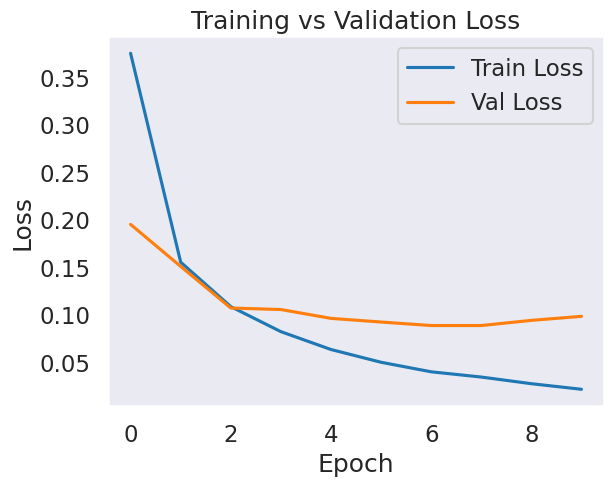

In [84]:
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss")
plt.show()


### Question 4: The weight matrix and bias vector in first hidden layer apply a linear transformation
before the activation function is applied. The ith row of the weight vector contains the weightings
of the 728 inputs to the ith neuron. The importance of each input on the ith neuron can then be
visualised by drawing the ith row of the weight vector as a greyscale image. Visualise 9 rows of the
weight matrix. <br />
- **Python help**: see the example code provided.<br />
- **Matlab help**:
  * One way to get the weight matrix of the trained network is to click “Matlab Matrix Only Function” in the “Deploy Solution” dialogue of nprtool. You will need to copy and paste IW1_1 and x1_step1_keep into a new script.
  * Each row will have to be normalised so that every element is in [0,1].
  * reshape() and imshow() may be useful.

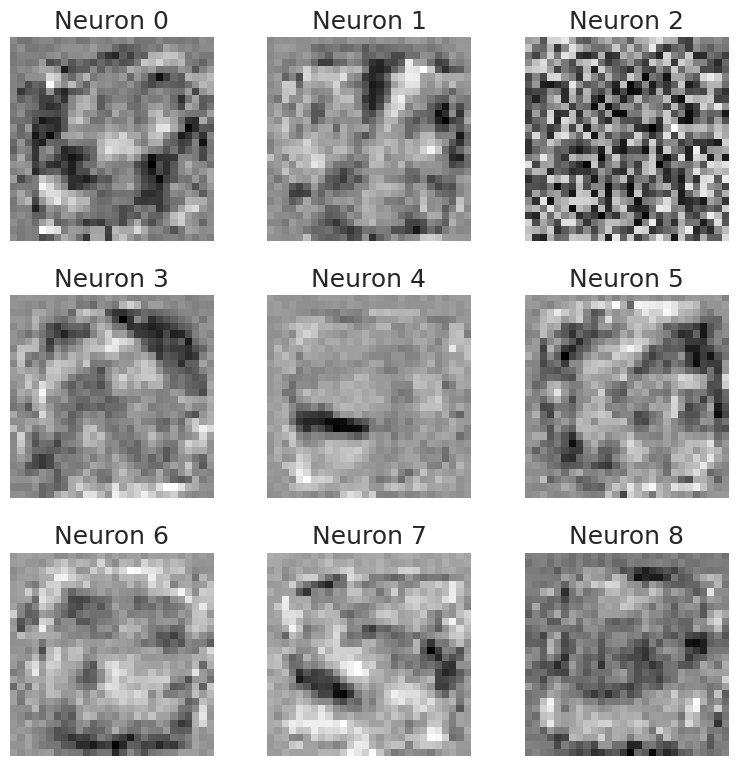

In [85]:
# Get the weight matrix of the first linear layer
# Assuming model is defined like: nn.Linear(784, 128)
weights = model.model[1].weight.data.cpu()  # Shape: [128, 784]

# Normalize function
def normalize_weights(w):
    w_min, w_max = w.min(), w.max()
    return (w - w_min) / (w_max - w_min)

# Select 9 neurons to visualize (e.g., first 9)
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
for i, ax in enumerate(axes.flat):
    w = weights[i]
    w_img = normalize_weights(w).reshape(28, 28)
    ax.imshow(w_img, cmap='gray')
    ax.set_title(f'Neuron {i}')
    ax.axis('off')

plt.tight_layout()
plt.show()


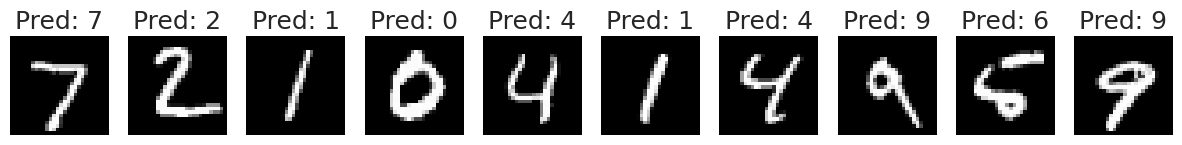

In [79]:
images, labels = next(iter(test_loader))
images, labels = images.to(device), labels.to(device)

# Get predictions
model.eval()
with torch.no_grad():
    output = model(images)
    preds = output.argmax(dim=1)

# Plotting
fig, axes = plt.subplots(1, 10, figsize=(15, 3))
for i in range(10):
    ax = axes[i]
    ax.imshow(images[i].cpu().numpy().squeeze(), cmap='gray')
    ax.set_title(f"Pred: {preds[i].item()}")
    ax.axis('off')
plt.show()

### Extra Topics to Note/Explore:
* Numerical methods (like gradient descent) typically require termination conditions. This could be a simple as training for a fixed number of epochs, however other things could also be considered (e.g. stopping if the magnitude of the gradient drops below some small value, or if the loss has not decreased by more than some small value in the last few steps. These choices are effectively hyperparameters of the configuration of any training experiment. Software libraries will typically have some default settings.
* You might like to explore using different training algorithms beyond stochastic gradient
descent (e.g. Adam).